In [3]:
# importing the packages
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import sklearn.exceptions
from pylab import rcParams
import plot_functions as pf
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, preprocessing, svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)



from sklearn.ensemble import RandomForestClassifier

## 1. Loading the data

### Acknowledgements
Link to the data set is the kaggle link as follows:

https://www.kaggle.com/kartik2112/fraud-detection

In [4]:
# loading data
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv")

## 2. Exploratory Data Analysis

#### 2.1 Data information

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

We see that there are 22 features    
"is_fraud" is the dependent variable 

#### 2.2 Shape of Data


In [6]:
print(data_train.shape,data_test.shape)

(1296675, 23) (555719, 23)


#### 2.3 Taking a fraction to run the model faster


In [7]:
# taking smaller sample to run the model faster

df_train= data_train.sample(frac = 0.1,random_state=1)
df_test= data_test.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)

(129668, 23) (27786, 23)


In [8]:
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
1238587,1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0


#### 2.4 Checking the null values


In [9]:
df_train.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

We see that no null values are present.

#### 2.5 Correlation Matrix


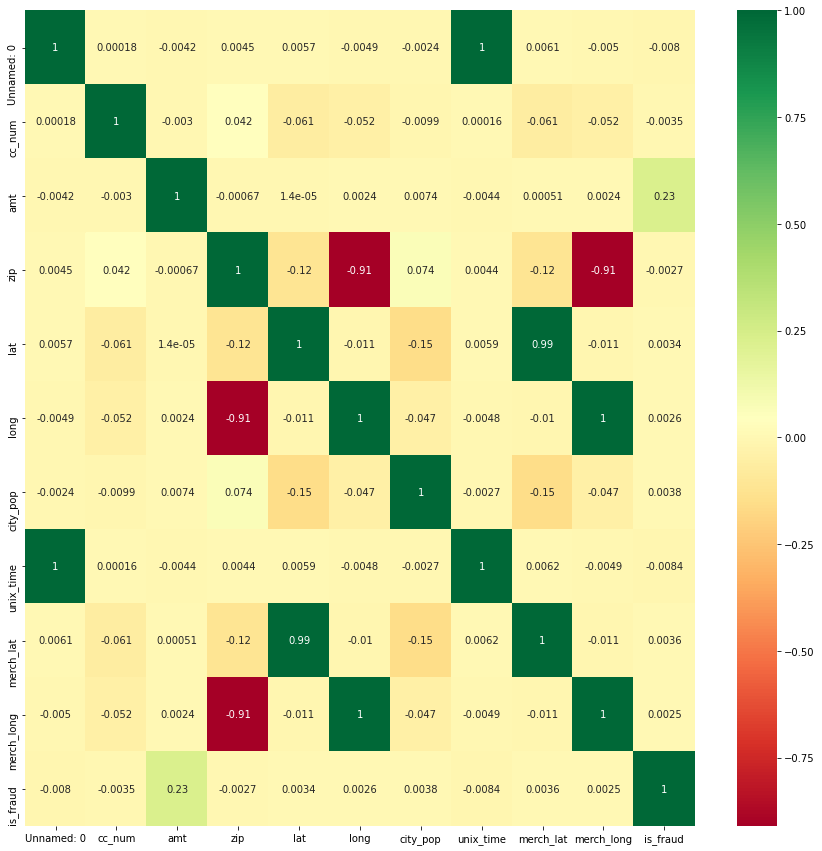

In [11]:
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### 2.6 Histograms

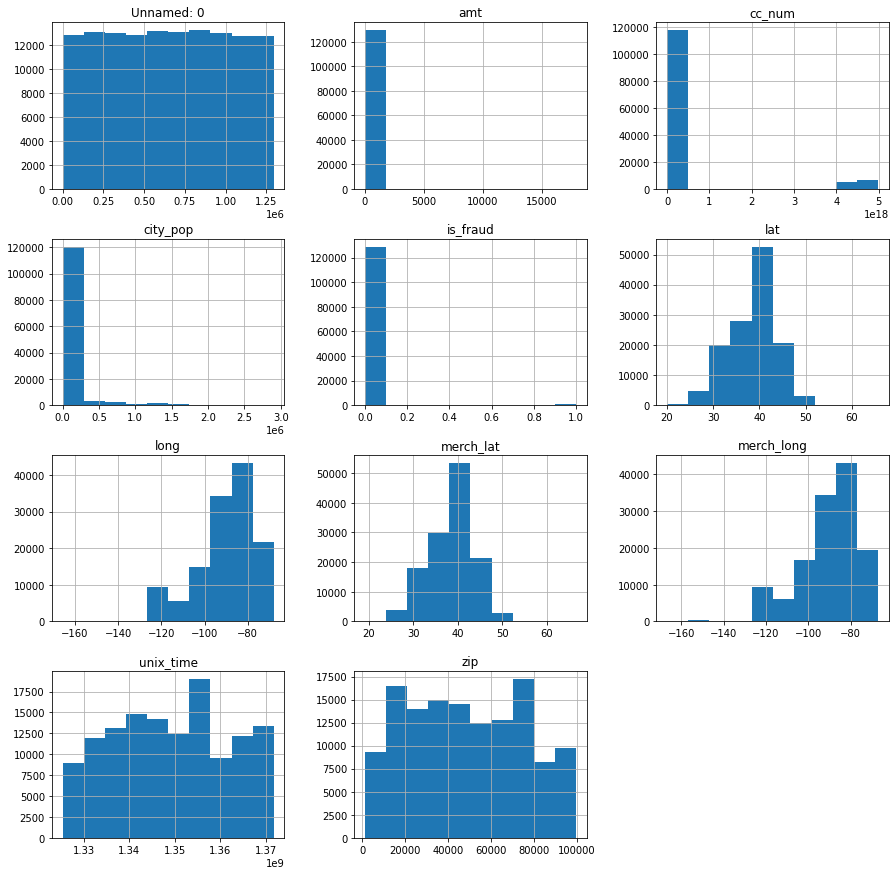

In [12]:
#visual representation of the data using histograms 
df_train.hist(figsize = (15, 15))
plt.show()

#### 2.7 Plotting the classes 

Text(0, 0.5, 'Frequency')

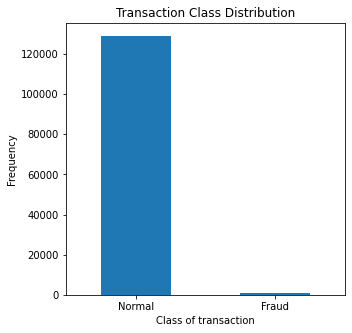

In [13]:
# plotting the classes
plt.figure(figsize=(5,5))
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ['Normal','Fraud']
plt.xticks(range(2), LABELS)
plt.xlabel("Class of transaction")
plt.ylabel("Frequency")

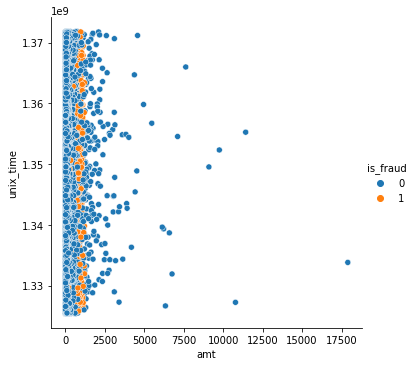

In [14]:
sns.relplot(y = 'unix_time', x = 'amt' , hue = 'is_fraud',data = df_train)

In [15]:
#sns.catplot(y = 'unix_time', x = 'amt' , hue = 'is_fraud',data = df_train)

We see that data is imbalanced    
#### 2.8  Getting the Fraud and the Normal  transaction numbers for test and train dataset


In [16]:
## Get the Fraud and the normal  transaction numbers for test and train dataset 

fraud_train = df_train[df_train['is_fraud']==1]
normal_train = df_train[df_train['is_fraud']==0]
fraud_test = df_test[df_test['is_fraud']==1]
normal_test = df_test[df_test['is_fraud']==0]

print("Normal cases in train set :",len(df_train)-len(fraud_train),"\nFraud cases in train set :",len(fraud_train))
print("Normal cases in test set :",len(df_test)-len(fraud_test),"\nFraud cases in test set :",len(fraud_test))


Normal cases in train set : 128963 
Fraud cases in train set : 705
Normal cases in test set : 27656 
Fraud cases in test set : 130



## 3. Data transformation and feature engineering


From the exploratory data Analysis we make the following observations:   

1. The first column contains just the indices and is not useful so we will drop it.   
2. The third column with customer card number is also not useful , so we will drop it. 
3. "first name" and "last name" can also be dropped.  
4. Transaction number - is it really needed? can be dropped.
5. Date time column can be used to calculate the age of the customer


#### 3.1 Dropping the columns not needed


In [17]:
# function to drop tbe columns
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res


In [18]:
# dropping the columns
# dropping the columns ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
# train data set
df_train = dropCol(df_train)
# test data set
df_test = dropCol(df_test)

print ( df_train.shape, df_test.shape)

(129668, 17) (27786, 17)


#### 3.2 Dropping the columns not needed


In [19]:
#Create independent and Dependent Features
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_train = df_train[columns]
Y_train = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(129668, 16) (129668,) (27786, 16) (27786,)


#### 3.3 Converting dob to age


In [20]:
# function to convert dob to years
def age_years(born):
    return 2019 - int(born[0:4])

# replacing the dob column with age column in our data set for test and train
X_train['age'] = X_train['dob'].apply(lambda x: age_years(x))
X_train = X_train.drop(['dob'],axis =1)

X_test['age'] = X_test['dob'].apply(lambda x: age_years(x))
X_test = X_test.drop(['dob'],axis =1)
print(X_train.shape,X_test.shape)


(129668, 16) (27786, 16)


In [109]:
X_train

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1330158280,46.398331,-99.813959,71
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1334260215,45.687331,-117.488135,76
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1370037053,27.254081,-81.974799,41
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1348160812,34.551957,-83.374265,22
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1346455370,43.032957,-83.521294,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944454,fraud_Reichert-Weissnat,travel,5.83,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,1358007774,40.522369,-79.314668,47
23683,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,1.96,F,27479 Reeves Dale,Whaleyville,MD,21872,38.4121,-75.2811,718,Regulatory affairs officer,1326572609,38.534192,-76.161654,34
296375,fraud_Lubowitz-Walter,kids_pets,26.59,F,72966 Shannon Pass Apt. 391,Bauxite,AR,72011,34.5091,-92.4828,4074,"Scientist, audiological",1337963080,35.175647,-91.740062,44
306312,"fraud_Runolfsdottir, Mueller and Hand",entertainment,6.00,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.0080,238602,"Scientist, research (maths)",1338216727,34.360264,-78.128199,26


#### 3.4 Converting the categorical features to numerical by one- hot - encoding



In [21]:
# concanating the test and train data so that number of columns remain the same in both the data sets
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape


(157454, 16)

In [22]:
# creating the list of categorical variables
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [23]:
#observing the unique values in each feature
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(final_df[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for street  are 957
Distinct categories for city  are 872
Distinct categories for state  are 51
Distinct categories for job  are 486


In [24]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [25]:
# applying the one hot encoding
final_df = category_onehot_multcols(final_df, categorical_features)


merchant
category
gender
street
city
state
job


In [26]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(157454, 3077)

In [27]:
# separating the test and training data
df_Train=final_df.iloc[:129668,:]
df_Test=final_df.iloc[129668:,:]
print(df_Train.shape,df_Test.shape)

(129668, 3077) (27786, 3077)


In [28]:
print(Y_train.value_counts(),"\n",Y_test.value_counts())

0    128963
1       705
Name: is_fraud, dtype: int64 
 0    27656
1      130
Name: is_fraud, dtype: int64


In [29]:
# files ready for testing on models
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)


(129668, 3077) (27786, 3077) (129668,) (27786,)


In [30]:
705/128963

0.005466684242767306

As we see that the data is skewed, i.e the number of samples for class 1 is less tha 0.5% of the samples of class 0.
In this case the the machine learning algorithms with not predict the Fraud cases correctly.
To predict the Fraud correctly we have two approaches:   
1. Handle the imbalance in Data and apply various Machine Learning algorithms and then apply ML models.    
2. Predict Fraud as outlier/Anomaly    
3. Change detection is similar to anomaly detection except rather than looking for an anomaly it is looking for a change or difference. This might be a change in behavior of a user as observed by usage patterns or bank transactions.

We proceed for the first method first.


## 4. Handling the Imbalance in data 

   
Handling the Imbalance in data by one of the following methods:   
> 4.1 Random Under-Sampling   
       4.2 Random Over-Sampling   
       4.3 SMOTE (Synthetic Minority over sampling technique)   
       4.4 Near Miss algorighm ( under sampling )   
       4.5 Ensemble method 
   




First we apply the model without handling the imbalance. We will use Logistic Regression and Decision Tree classifier for our exploration of the method to apply to handle imbalance in data. 

In [29]:
# Logistic Regression
model_LR = LogisticRegression(random_state=137)
model_LR.fit(df_Train,Y_train)
y_pred = model_LR.predict(df_Test)

In [32]:
#Let's evaluate our model 
def print_eval(y_pred,model):
    print("Training Accuracy: ",model.score(df_Train, Y_train))
    print("Testing Accuracy: ", model.score(df_Test, Y_test))
    cm = confusion_matrix(Y_test, y_pred)
    print(cm)
    print(classification_report(Y_test,y_pred))


In [31]:
# Logistic Regression Classification results without balancong class
print_eval(y_pred,model_LR)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[27656     0]
 [  130     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.00      0.00      0.00       130

    accuracy                           1.00     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      1.00      0.99     27786



In [32]:
# decision tree
decision_tree_model = DecisionTreeClassifier(random_state=137)
decision_tree_model.fit(df_Train,Y_train)
y_pred = decision_tree_model.predict(df_Test)
# Decision Tree Classification results without balancong class
print_eval(y_pred,decision_tree_model)

Training Accuracy:  1.0
Testing Accuracy:  0.9866839415533002
[[27333   323]
 [   47    83]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.20      0.64      0.31       130

    accuracy                           0.99     27786
   macro avg       0.60      0.81      0.65     27786
weighted avg       0.99      0.99      0.99     27786



In [34]:
# helper function to print a comparitive results of all models
model_list = {}
def getComparitiveChart(model_list,model_name,model):
    print('\033[1m', " Comparitive Chart of all models")
    if model_name not in model_list:
        model_list[model_name]= model
    
    print( " Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0")
    for i,v in model_list.items():
        pred = v.predict(df_Test)
        prfs = precision_recall_fscore_support(Y_test,pred , average=None)
        #res_recall[i] = round(prfs[1][1],2)
        recall_0   = prfs[1][0]
        recall_1   = prfs[1][1]
        f1_score_0 = prfs[2][0]
        f1_score_1 = prfs[2][1]

        print(f'{f"{i}":<35}' ,"{:.2f}".format(recall_1),"\t\t","{:.2f}".format(recall_0),
               "\t\t","{:.2f}".format(f1_score_1),"\t\t","{:.2f}".format(f1_score_0) )
        
getComparitiveChart(model_list,'Logistic Regression',model_LR)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00


In [35]:
getComparitiveChart(model_list,'Decision Tree',decision_tree_model)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99


#### Metric Analysis

1. **True  Positives** : Correctly classified as Safe Transaction     = 27333 (.99)   
2. **False Negitives** : Mis-classified Safe Transaction              = 323 (Harmless)   
3. **False Positives** : Mis-classified as Fraud Transactions         = 47 (Dangerous )   
4. **True Negatives**  : Correctly classified as Fraud Transactions   = 83 (out of 130 -> .64)   
5. **Accuracy**        : .99   

Here the accuracy is not taken into account as it is misleading.   
We want to get maximum True Negatives i.e we want to predict the Fraud tranactions with maximum accuracy. This can be done by monitoring the Recall.

So when the data is imbalanced the Recall is    
class 0 (Safe) : 0.99   
class 1 (Fraud): 0.64   

**We want the recall of class 1 to be close to 1.00**    
**We can also use f1-score as a metric to observe**




### 4.1 Implementing Random Under-sampling

**Advantages**   
- It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.   

**Disadvantages**   
- It can discard potentially useful information which could be important for building rule classifiers.
The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.



In [36]:
# adding the dependent feature in the train data set
print(Y_train.shape,df_Train.shape)
df_train = pd.concat([df_Train,Y_train],axis = 1)
df_train.shape


(129668,) (129668, 3077)


(129668, 3078)

In [37]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

128963 705
(128963, 3078) (705, 3078)


In [38]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under_sample.is_fraud.value_counts())


Random under-sampling:
1    705
0    705
Name: is_fraud, dtype: int64


In [39]:
# training and predictions : Logistic Regression Under Sampling 
X = df_train_under_sample.drop('is_fraud',axis='columns')
y = df_train_under_sample['is_fraud']
model_LR_under_sample = LogisticRegression(random_state=137)
model_LR_under_sample.fit(X,y)
y_pred = model_LR_under_sample.predict(df_Test)
print_eval(y_pred,model_LR_under_sample)

Training Accuracy:  0.843909060061079
Testing Accuracy:  0.8447419563809112
[[23455  4201]
 [  113    17]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     27656
           1       0.00      0.13      0.01       130

    accuracy                           0.84     27786
   macro avg       0.50      0.49      0.46     27786
weighted avg       0.99      0.84      0.91     27786



In [40]:
# training and predictions : decision tree Regression Under Sampling
decision_tree_model_undersample = DecisionTreeClassifier(random_state=137)
decision_tree_model_undersample.fit(X,y)
y_pred = decision_tree_model_undersample.predict(df_Test)
print_eval(y_pred,decision_tree_model_undersample)

Training Accuracy:  0.9302140852022087
Testing Accuracy:  0.9329878356006622
[[25797  1859]
 [    3   127]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     27656
           1       0.06      0.98      0.12       130

    accuracy                           0.93     27786
   macro avg       0.53      0.95      0.54     27786
weighted avg       1.00      0.93      0.96     27786



In [41]:
getComparitiveChart(model_list,'Logistic Regression Under Sample',model_LR_under_sample)



  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92


In [42]:
getComparitiveChart(model_list,'Decision Tree Under Sample',decision_tree_model_undersample)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97


### Comparision of results and Observations :

|                                       | Class-0 Recall| Class-1 Recall|Class-0 f1-score| Class-1 f1-score|
|---------------------------------------|---------------|---------------|----------------|-----------------|
|Logistic Regression                    |     1.00      |     0.00      |     1.00       |      0.00       |
|Decision Tree Classifier               |     0.99      |     0.64      |     0.99       |      0.31       |
|Logistic Regression Under Sampling     |     1.00      |     0.00      |     1.00       |      0.50       |
|Decision Tree Classifier Under Sampling|     0.94      |     0.95      |     0.97       |      0.13       |


### 4.2 Implementing Random Over-sampling

**Advantages**
- Unlike under sampling this method leads to no information loss.
- Outperforms under sampling  

**Disadvantages**
- It increases the likelihood of overfitting since it replicates the minority class events.


In [43]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

128963 705
(128963, 3078) (705, 3078)


In [44]:
# Oversample 1-class and concat the DataFrames of both class
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_train_over_sample = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')

print(df_train_over_sample.is_fraud.value_counts())

Random over-sampling:
1    128963
0    128963
Name: is_fraud, dtype: int64


In [45]:
# training and predictions : Logistic Regression
X = df_train_over_sample.drop('is_fraud',axis='columns')
y = df_train_over_sample['is_fraud']
model_LR_over_sample = LogisticRegression(random_state=137)
model_LR_over_sample.fit(X,y)
y_pred = model_LR_over_sample.predict(df_Test)
print_eval(y_pred,model_LR_over_sample)

Training Accuracy:  0.8594564580312799
Testing Accuracy:  0.8624847045274598
[[23953  3703]
 [  118    12]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     27656
           1       0.00      0.09      0.01       130

    accuracy                           0.86     27786
   macro avg       0.50      0.48      0.47     27786
weighted avg       0.99      0.86      0.92     27786



In [46]:
# training and predictions : decision tree
decision_tree_model_over_sample = DecisionTreeClassifier(random_state=137)
decision_tree_model_over_sample.fit(X,y)
y_pred = decision_tree_model_over_sample.predict(df_Test)
print_eval(y_pred,decision_tree_model_over_sample)

Training Accuracy:  1.0
Testing Accuracy:  0.9938818109839488
[[27583    73]
 [   97    33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.31      0.25      0.28       130

    accuracy                           0.99     27786
   macro avg       0.65      0.63      0.64     27786
weighted avg       0.99      0.99      0.99     27786



In [47]:
getComparitiveChart(model_list,'Logistic Regression Over Sample',model_LR_over_sample)


  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97
Logistic Regression Over Sample     0.09 		 0.87 		 0.01 		 0.93


In [48]:

getComparitiveChart(model_list,'Decision Tree Over Sample',decision_tree_model_over_sample)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97
Logistic Regression Over Sample     0.09 		 0.87 		 0.01 		 0.93
Decision Tree Over Sample           0.25 		 1.00 		 0.28 		 1.00


### 4.3 Implementing SMOTE (Synthetic Minority Over Sampling Technique) - Informed Over Sampling

SMOTE algorithm works in 4 simple steps:

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function,defalut value is 5)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

**Advantages**
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances   
- No loss of useful information   

**Disadvantages**
- While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise   
- SMOTE is not very effective for high dimensional data

In [49]:
print(df_Train.shape,df_Test.shape)

(129668, 3077) (27786, 3077)


In [72]:
# smote implementation
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_sample(df_Train, Y_train)
y_sm.value_counts()

1    128963
0    128963
Name: is_fraud, dtype: int64

In [52]:
# training and predictions : Logistic Regression

model_LR_smote = LogisticRegression(random_state=137)
model_LR_smote.fit(X_sm,y_sm)
y_pred = model_LR_smote.predict(df_Test)
print_eval(y_pred,model_LR_smote)

Training Accuracy:  0.4928972452725422
Testing Accuracy:  0.47970200820557113
[[13272 14384]
 [   73    57]]
              precision    recall  f1-score   support

           0       0.99      0.48      0.65     27656
           1       0.00      0.44      0.01       130

    accuracy                           0.48     27786
   macro avg       0.50      0.46      0.33     27786
weighted avg       0.99      0.48      0.64     27786



In [53]:
# training and predictions : decision tree
decision_tree_model_smote = DecisionTreeClassifier(random_state=137)
decision_tree_model_smote.fit(X_sm,y_sm)
y_pred = decision_tree_model_smote.predict(df_Test)
print_eval(y_pred,decision_tree_model_smote)

Training Accuracy:  1.0
Testing Accuracy:  0.991542503418988
[[27478   178]
 [   57    73]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     27656
           1       0.29      0.56      0.38       130

    accuracy                           0.99     27786
   macro avg       0.64      0.78      0.69     27786
weighted avg       0.99      0.99      0.99     27786



In [54]:
getComparitiveChart(model_list,'Logistic Regression SMOTE',model_LR_smote)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97
Logistic Regression Over Sample     0.09 		 0.87 		 0.01 		 0.93
Decision Tree Over Sample           0.25 		 1.00 		 0.28 		 1.00
Logistic Regression SMOTE           0.44 		 0.48 		 0.01 		 0.65


In [55]:
getComparitiveChart(model_list,'Decision Tree SMOTE',decision_tree_model_smote)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97
Logistic Regression Over Sample     0.09 		 0.87 		 0.01 		 0.93
Decision Tree Over Sample           0.25 		 1.00 		 0.28 		 1.00
Logistic Regression SMOTE           0.44 		 0.48 		 0.01 		 0.65
Decision Tree SMOTE                 0.56 		 0.99 		 0.38 		 1.00




**We see that Under sampling gives better results till now**
### 4.4 Implementing Near Miss

NearMiss is an under-sampling technique.    
Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.   
Steps in Near Miss Algorithm.  
- Step 1: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.
- Step 2: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
- Step 3: If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.


For finding n closest instances in the majority class, there are several variations of applying NearMiss Algorithm :   

- NearMiss – Version 1 : It selects samples of the majority class for which average distances to the k closest instances of the minority class is smallest.
- NearMiss – Version 2 : It selects samples of the majority class for which average distances to the k farthest instances of the minority class is smallest.
- NearMiss – Version 3 : It works in 2 steps. Firstly, for each minority class instance, their M nearest-neighbors will be stored. Then finally, the majority class instances are selected for which the average distance to the N nearest-neighbors is the largest.

In [58]:
# near miss
nr = NearMiss() 
X_train_miss, y_train_miss = nr.fit_sample(df_Train, Y_train) 
print('Near Miss:')
print(y_train_miss.value_counts())

Near Miss:
1    705
0    705
Name: is_fraud, dtype: int64


In [59]:
print(y_train_miss.value_counts())

1    705
0    705
Name: is_fraud, dtype: int64


In [60]:
# training and predictions : Logistic Regression

model_LR_nm = LogisticRegression(random_state=137)
model_LR_nm.fit(X_train_miss,y_train_miss)
y_pred = model_LR_nm.predict(df_Test)
print_eval(y_pred,model_LR_nm)

Training Accuracy:  0.6187185735879323
Testing Accuracy:  0.6264665658964946
[[17361 10295]
 [   84    46]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     27656
           1       0.00      0.35      0.01       130

    accuracy                           0.63     27786
   macro avg       0.50      0.49      0.39     27786
weighted avg       0.99      0.63      0.77     27786



### trade off between precision and recall

https://www.kaggle.com/robinteuwens/precision-vs-recall-optimizing-fraud-costs

In [61]:
# training and predictions : decision tree
decision_tree_model_nm = DecisionTreeClassifier(random_state=137)
decision_tree_model_nm.fit(X_train_miss,y_train_miss)
y_pred = decision_tree_model_nm.predict(df_Test)
print_eval(y_pred,decision_tree_model_nm)

Training Accuracy:  0.6950596909029213
Testing Accuracy:  0.696681782192471
[[19236  8420]
 [    8   122]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     27656
           1       0.01      0.94      0.03       130

    accuracy                           0.70     27786
   macro avg       0.51      0.82      0.42     27786
weighted avg       0.99      0.70      0.82     27786



In [62]:
getComparitiveChart(model_list,'Logistic Regression Near Miss',model_LR_nm)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97
Logistic Regression Over Sample     0.09 		 0.87 		 0.01 		 0.93
Decision Tree Over Sample           0.25 		 1.00 		 0.28 		 1.00
Logistic Regression SMOTE           0.44 		 0.48 		 0.01 		 0.65
Decision Tree SMOTE                 0.56 		 0.99 		 0.38 		 1.00
Logistic Regression Near Miss       0.35 		 0.63 		 0.01 		 0.77


In [63]:
getComparitiveChart(model_list,'Decision Tree Near Miss',decision_tree_model_nm)

  Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.13 		 0.85 		 0.01 		 0.92
Decision Tree Under Sample          0.98 		 0.93 		 0.12 		 0.97
Logistic Regression Over Sample     0.09 		 0.87 		 0.01 		 0.93
Decision Tree Over Sample           0.25 		 1.00 		 0.28 		 1.00
Logistic Regression SMOTE           0.44 		 0.48 		 0.01 		 0.65
Decision Tree SMOTE                 0.56 		 0.99 		 0.38 		 1.00
Logistic Regression Near Miss       0.35 		 0.63 		 0.01 		 0.77
Decision Tree Near Miss             0.94 		 0.70 		 0.03 		 0.82


### 4.5 Comparisions of different models



========================== Model Test Results ========================

=== dc ===
Model Accuracy:  98.7%

Recall:
 0.6384615384615384


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.20      0.64      0.31       130

    accuracy                           0.99     27786
   macro avg       0.60      0.81      0.65     27786
weighted avg       0.99      0.99      0.99     27786


=== dc_us ===
Model Accuracy:  93.30000000000001%

Recall:
 0.9769230769230769


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97     27656
           1       0.06      0.98      0.12       130

    accuracy                           0.93     27786
   macro avg       0.53      0.95      0.54     27786
weighted avg       1.00      0.93      0.96     27786


=== dc_os ===
Model Accuracy:  99.4%

Recall:
 0.25384615384615383


Classifi

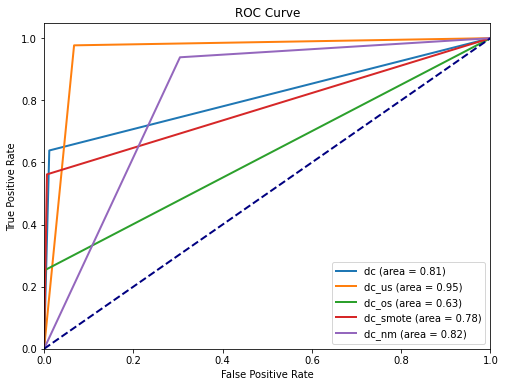

In [64]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   
modlist = [('dc', decision_tree_model),
           ('dc_us', decision_tree_model_undersample),
           ('dc_os', decision_tree_model_over_sample),
           ('dc_smote', decision_tree_model_smote),
           ('dc_nm', decision_tree_model_nm)
           
          ] 
models = [j for j in modlist]
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(df_Test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(df_Test))
    classification = metrics.classification_report(Y_test, v.predict(df_Test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Recall:" "\n", confusion_matrix[1][1]/130)
    print()
    #pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()),title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
pf.plot_roc_auc(arg1=models, arg2=df_Test, arg3=Y_test)



### 4.5 Implementing the models
>4.5.1	Logistic Regression   
4.5.2	SVM    
4.5.3	XGBoost    
4.5.4	Random Forest   
4.5.5	Artificial Neural Network   
4.5.6   Penalized-SVM   


Penalize Algorithms (Cost-Sensitive Training)
The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM.

During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms.

Let’s train a model using Penalized-SVM on the original imbalanced dataset:

### 4.6 Taking into consideration all samples that were considered fraud by any of the model

In [65]:
# method to combine all the fraud samples
modlist = [('dc      ', decision_tree_model),
           ('dc_us   ', decision_tree_model_undersample),
           ('dc_os   ', decision_tree_model_over_sample),
           ('dc_smote', decision_tree_model_smote),
           ('dc_nm   ', decision_tree_model_nm)]
res_recall = {}
res = pd.DataFrame()
for i,v in modlist:
    pred = v.predict(df_Test)
    y_df = pd.DataFrame(pred)
    res = pd.concat([res,y_df],axis = 1)
    #recall
    prfs = precision_recall_fscore_support(Y_test,pred , average=None)
    res_recall[i] = round(prfs[1][1],2)

# column total has value 1 if any of the models has predicted a fraud
res.loc[:,'total'] = res.max(axis = 1)  
res = res['total']
report = classification_report(Y_test,res)
print(classification_report(Y_test,res))

prfs = precision_recall_fscore_support(Y_test,res , average=None)
res_recall['Combined'] = round(prfs[1][1],2)
print('\033[1m', " Recall of combined results is :" ,round(prfs[1][1],4) )

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     27656
           1       0.01      1.00      0.03       130

    accuracy                           0.68     27786
   macro avg       0.51      0.84      0.42     27786
weighted avg       1.00      0.68      0.80     27786

  Recall of combined results is : 1.0


In [66]:
# report generation of recall of all models
print("Model" , "           Recall")
for i,v in res_recall.items():
    print( i ,"\t",v)

Model            Recall
dc       	 0.64
dc_us    	 0.98
dc_os    	 0.25
dc_smote 	 0.56
dc_nm    	 0.94
Combined 	 1.0


Implementing models

In [101]:
# files ready for testing on models
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)

(129668, 3077) (27786, 3077) (129668,) (27786,)


### Random Forest Classifier

#### sklearn default parameters:    

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)    


The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees.
The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

Folowing are the hyper parameters to be tuned for Random Forest :   
>- max_depth - The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.   
- min_sample_split – a parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.    
The default value of the minimum_sample_split is assigned to 2.  
By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting.    
- max_leaf_nodes - This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree. If after splitting we have more terminal nodes than the specified number of terminal nodes, it will stop the splitting and the tree will not grow further.   
- min_samples_leaf - This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree. If after splitting we have more terminal nodes than the specified number of terminal nodes, it will stop the splitting and the tree will not grow further.   
- n_estimators - Random Forest algorithm is a grouping of trees. n_estimators is the number of trees.More trees should be able to produce a more generalized result, but by choosing more number of trees, the time complexity of the Random Forest model also increases.      
- max_sample (bootstrap sample) - The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.    
- max_features -  It is the number of maximum features provided to each tree in a random forest.  
default=”auto”

In [31]:
# raw data max_leaf_nodes = None(unlimited)
# creating a RF classifier 
from sklearn.metrics import confusion_matrix
model_random_forest = RandomForestClassifier(n_estimators = 100,random_state=137)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
model_random_forest.fit(df_Train, Y_train) 

# performing predictions on the test dataset 
y_pred = model_random_forest.predict(df_Test) 




NameError: name 'print_eval' is not defined

In [33]:
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9999922879970385
Testing Accuracy:  0.9963290865903692
[[27655     1]
 [  101    29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.97      0.22      0.36       130

    accuracy                           1.00     27786
   macro avg       0.98      0.61      0.68     27786
weighted avg       1.00      1.00      1.00     27786



In [35]:

# on train data
y_pred11 = model_random_forest.predict(df_Train)
print(classification_report(Y_train,y_pred11))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128963
           1       1.00      1.00      1.00       705

    accuracy                           1.00    129668
   macro avg       1.00      1.00      1.00    129668
weighted avg       1.00      1.00      1.00    129668



In [49]:
# raw data max_leaf_nodes = None(unlimited)
# creating a RF classifier 
from sklearn.metrics import confusion_matrix
model_random_forest2 = RandomForestClassifier(n_estimators = 130,random_state=137, max_leaf_nodes=10)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
model_random_forest2.fit(df_Train, Y_train) 

# performing predictions on the test dataset 
y_pred2 = model_random_forest2.predict(df_Test) 
print_eval(y_pred2,model_random_forest)

Training Accuracy:  0.9999922879970385
Testing Accuracy:  0.9963290865903692
[[27656     0]
 [  130     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.00      0.00      0.00       130

    accuracy                           1.00     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      1.00      0.99     27786



In [50]:
y_pred22 = model_random_forest2.predict(df_Train) 

In [52]:
print(confusion_matrix(Y_train,y_pred22))
print(classification_report(Y_train,y_pred22))

[[128963      0]
 [   665     40]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    128963
           1       1.00      0.06      0.11       705

    accuracy                           0.99    129668
   macro avg       1.00      0.53      0.55    129668
weighted avg       0.99      0.99      0.99    129668



In [159]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.611520382278988

In [71]:
# raw data 
# creating a RF classifier 
from sklearn.metrics import confusion_matrix
model_random_forest = RandomForestClassifier(random_state=137)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
model_random_forest.fit(df_Train, Y_train) 

# performing predictions on the test dataset 
y_pred = model_random_forest.predict(df_Test) 

print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9999922879970385
Testing Accuracy:  0.9963290865903692
[[27655     1]
 [  101    29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.97      0.22      0.36       130

    accuracy                           1.00     27786
   macro avg       0.98      0.61      0.68     27786
weighted avg       1.00      1.00      1.00     27786



In [73]:
from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(random_state=137) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9999922879970385
Testing Accuracy:  0.9963290865903692
[[27641    15]
 [  127     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.17      0.02      0.04       130

    accuracy                           0.99     27786
   macro avg       0.58      0.51      0.52     27786
weighted avg       0.99      0.99      0.99     27786



In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.5112672726463585

WE see that performance deteriorates on limiting the max_leaf_nodes

### Working with SMOTE data

In [162]:
from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 50 ,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26861   795]
 [   44    86]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     27656
           1       0.10      0.66      0.17       130

    accuracy                           0.97     27786
   macro avg       0.55      0.82      0.58     27786
weighted avg       0.99      0.97      0.98     27786



In [163]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8163962194877727

In [164]:
from sklearn.metrics import confusion_matrix
# smote
# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 75 ,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26955   701]
 [   42    88]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.11      0.68      0.19       130

    accuracy                           0.97     27786
   macro avg       0.55      0.83      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [165]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8257879775705925

In [166]:
# smote   max_leaf_nodes = None(unlimited)

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 100,random_state=137) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)

print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[27641    15]
 [  126     4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.21      0.03      0.05       130

    accuracy                           0.99     27786
   macro avg       0.60      0.52      0.53     27786
weighted avg       0.99      0.99      0.99     27786



In [167]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.5151134264925123

In [168]:
from sklearn.metrics import confusion_matrix
# smote  max_leaf_nodes = 16

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 100,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26953   703]
 [   41    89]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.11      0.68      0.19       130

    accuracy                           0.97     27786
   macro avg       0.56      0.83      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [169]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8295979728977994

In [170]:
from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 100,random_state=137, max_leaf_nodes=32) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[27182   474]
 [   75    55]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     27656
           1       0.10      0.42      0.17       130

    accuracy                           0.98     27786
   macro avg       0.55      0.70      0.58     27786
weighted avg       0.99      0.98      0.99     27786



In [171]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.7029688925480074

#### Increasing the max_leaf_nodes does not give any improvement, so we proceed with value 16

In [172]:
from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 125,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)

print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26948   708]
 [   38    92]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.12      0.71      0.20       130

    accuracy                           0.97     27786
   macro avg       0.56      0.84      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [173]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8410460381388932

In [174]:

from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)

print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26956   700]
 [   38    92]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.12      0.71      0.20       130

    accuracy                           0.97     27786
   macro avg       0.56      0.84      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [175]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8411906722146815

In [176]:

from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 140,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)

print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26981   675]
 [   41    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     27656
           1       0.12      0.68      0.20       130

    accuracy                           0.97     27786
   macro avg       0.56      0.83      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [177]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8301041921630583

In [178]:
from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 131,random_state=137, max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)

print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26953   703]
 [   39    91]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.11      0.70      0.20       130

    accuracy                           0.97     27786
   macro avg       0.56      0.84      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [179]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8372902805901071

**Continuing with n_estimators = 100,random_state=130, max_leaf_nodes=16**

In [180]:
from sklearn.metrics import confusion_matrix
# smote  max_leaf_nodes = 16

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,
                                                   random_state=137, 
                                                   max_leaf_nodes=16,
                                                  max_features = 6) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26767   889]
 [   70    60]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     27656
           1       0.06      0.46      0.11       130

    accuracy                           0.97     27786
   macro avg       0.53      0.71      0.55     27786
weighted avg       0.99      0.97      0.98     27786



In [181]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.714696769097261

In [182]:
from sklearn.metrics import confusion_matrix
# smote  max_features = 20

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,
                                                   random_state=137, 
                                                   max_leaf_nodes=16,
                                                  max_features = 20) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26500  1156]
 [   75    55]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27656
           1       0.05      0.42      0.08       130

    accuracy                           0.96     27786
   macro avg       0.52      0.69      0.53     27786
weighted avg       0.99      0.96      0.97     27786



In [183]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.6906388375870587

In [184]:
from sklearn.metrics import confusion_matrix
# smote  max_features = 20

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,
                                                   random_state=137, 
                                                   max_leaf_nodes=16,
                                                  max_features = 3) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[23481  4175]
 [  104    26]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     27656
           1       0.01      0.20      0.01       130

    accuracy                           0.85     27786
   macro avg       0.50      0.52      0.46     27786
weighted avg       0.99      0.85      0.91     27786



In [185]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.524519091698004

In [186]:
from sklearn.metrics import confusion_matrix
# smote best model 

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,
                                                   random_state=137, 
                                                   max_leaf_nodes=16) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26956   700]
 [   38    92]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.12      0.71      0.20       130

    accuracy                           0.97     27786
   macro avg       0.56      0.84      0.59     27786
weighted avg       0.99      0.97      0.98     27786



In [187]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8411906722146815

In [188]:
from sklearn.metrics import confusion_matrix
# smote best model 

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,
                                                   random_state=137, 
                                                   max_leaf_nodes=10) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26824   832]
 [   33    97]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     27656
           1       0.10      0.75      0.18       130

    accuracy                           0.97     27786
   macro avg       0.55      0.86      0.58     27786
weighted avg       0.99      0.97      0.98     27786



In [189]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8580349791949444

In [190]:
from sklearn.metrics import confusion_matrix
# smote best model 

# training and predictions : random forest 
random_forest_model_smote = RandomForestClassifier(n_estimators = 130,
                                                   random_state=137, 
                                                   max_leaf_nodes=9) 
random_forest_model_smote.fit(X_sm,y_sm)
y_pred = random_forest_model_smote.predict(df_Test)
print_eval(y_pred,model_random_forest)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[26796   860]
 [   37    93]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     27656
           1       0.10      0.72      0.17       130

    accuracy                           0.97     27786
   macro avg       0.55      0.84      0.58     27786
weighted avg       0.99      0.97      0.98     27786



In [191]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.8421441445450703

### best hyper parameters for Random Forest
(n_estimators = 130,
 random_state=137, 
 max_leaf_nodes=10)

   
### 5.  Considering the Fraud cases as anamoly and use anamoly detection methods such as:   
> 5.1 Simple Statistical Methods : Metrics such as distribution, including mean, median, mode, and quantiles could be used to identify outliers since the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. 
       5.2 Density-Based Anomaly Detection : These include the k-nearest neighbors algorithm, Relative density of data based method known as local outlier factor (LOF) algorithm    
       5.3 Clustering-Based Anomaly Detection : K-means algorithm  
       5.4 Support Vector Machine-Based Anomaly Detection      
       5.5 Isolation Forest : https://www.youtube.com/watch?v=TP3wdwD8JVY    
       5.6 Using Auto Encoders : https://www.youtube.com/watch?v=S31E-ftRfQI
   


In [ ]:
prec = [1,2,3,4]
reca = [2,3,1,4]
f1sc = [.2,.7,.8,.9]

 We will deal with anomaly detection in a separate notebook

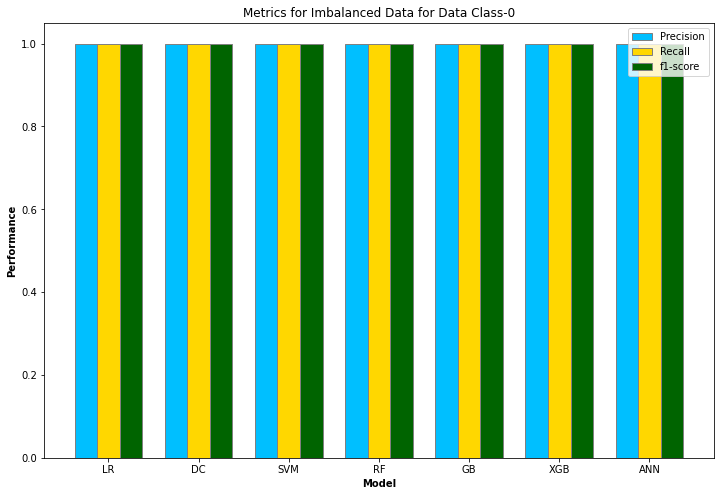

In [106]:
# for raw class 0

import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# set height of bar 
prec =  [1 ,1,1,1,1,1,1]
recall= [1 ,1,1,1,1,1,1]
f1score = [1 ,1,1,1,1,1,1]
   
# Set position of bar on X axis 
br1 = np.arange((7)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# Make the plot 
plt.bar(br1, prec, color ='deepskyblue', width = barWidth, 
        edgecolor ='grey', label ='Precision') 
plt.bar(br2, recall, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Recall') 
plt.bar(br3, f1score, color ='darkgreen', width = barWidth, 
        edgecolor ='grey', label ='f1-score') 
   
# Adding Xticks  
plt.xlabel('Model', fontweight ='bold') 
plt.ylabel('Performance', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(prec))], 
           ['LR', 'DC', 'SVM', 'RF', 'GB','XGB','ANN']) 
plt.legend()  
plt.title("Metrics for Imbalanced Data for Data Class-0")
plt.show() 

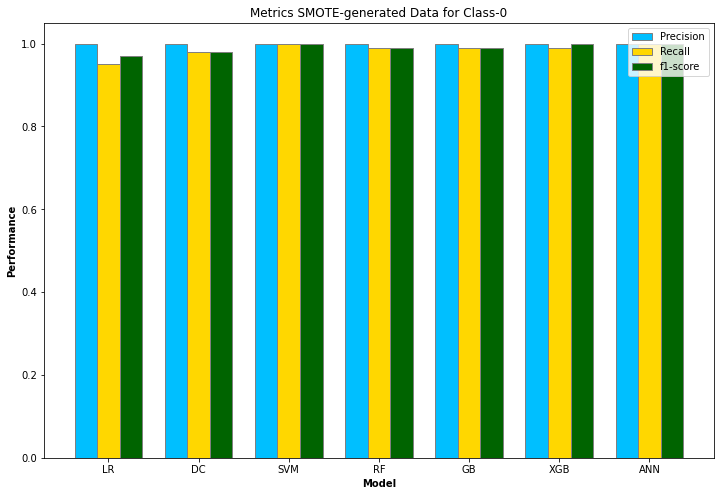

In [104]:
# for smote class 0

import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# set height of bar 
prec =  [1 ,1,1,1,1,1,1]
recall= [.95,.98,1,.99,.99,.99,1]
f1score = [.97,.98,1,.99,.99,1,1]
   
# Set position of bar on X axis 
br1 = np.arange((7)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# Make the plot 
plt.bar(br1, prec, color ='deepskyblue', width = barWidth, 
        edgecolor ='grey', label ='Precision') 
plt.bar(br2, recall, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Recall') 
plt.bar(br3, f1score, color ='darkgreen', width = barWidth, 
        edgecolor ='grey', label ='f1-score') 
   
# Adding Xticks  
plt.xlabel('Model', fontweight ='bold') 
plt.ylabel('Performance', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(prec))], 
           ['LR', 'DC', 'SVM', 'RF', 'GB','XGB','ANN']) 
plt.legend()  
plt.title("Metrics SMOTE-generated Data for Class-0")
plt.show() 

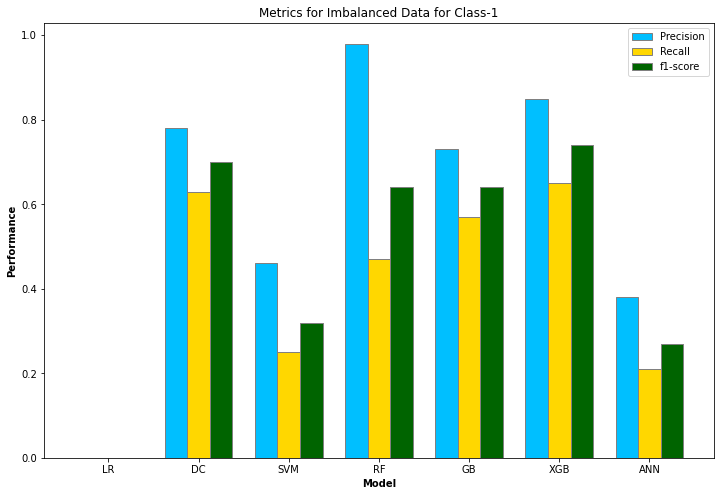

In [105]:
# for raw class 1

import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# set height of bar 
prec = [0,.78,.46,.98,.73,.85,.38]   
recall= [0,.63,.25,.47,.57,.65,.21]
f1score = [0,.70,.32,.64,.64,.74,.27] 
   
# Set position of bar on X axis 
br1 = np.arange((7)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# Make the plot 
plt.bar(br1, prec, color ='deepskyblue', width = barWidth, 
        edgecolor ='grey', label ='Precision') 
plt.bar(br2, recall, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Recall') 
plt.bar(br3, f1score, color ='darkgreen', width = barWidth, 
        edgecolor ='grey', label ='f1-score') 
   
# Adding Xticks  
plt.xlabel('Model', fontweight ='bold') 
plt.ylabel('Performance', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(prec))], 
           ['LR', 'DC', 'SVM', 'RF', 'GB','XGB','ANN']) 
plt.legend()  
plt.title("Metrics for Imbalanced Data for Class-1")
plt.show() 

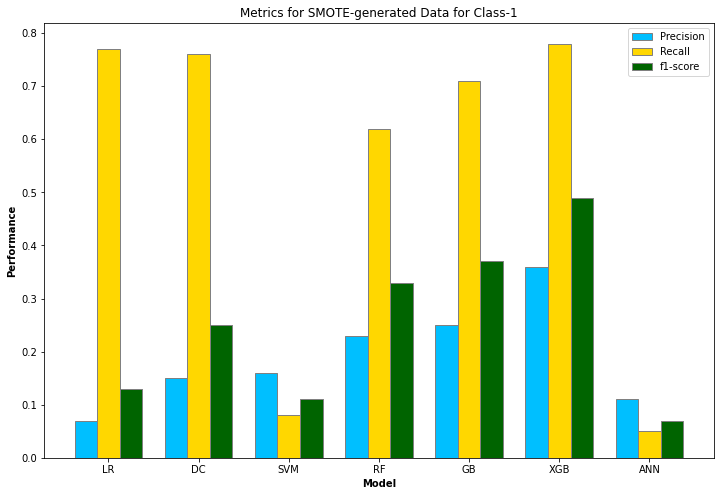

In [108]:
# for raw class 1

import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
  
# set height of bar 
prec = [.07,.15,.16,.23,.25,.36,.11]  
recall= [.77,.76,.08,.62,.71,.78,.05]
f1score = [.13,.25,.11,.33,.37,.49,.07]
   
# Set position of bar on X axis 
br1 = np.arange((7)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# Make the plot 
plt.bar(br1, prec, color ='deepskyblue', width = barWidth, 
        edgecolor ='grey', label ='Precision') 
plt.bar(br2, recall, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Recall') 
plt.bar(br3, f1score, color ='darkgreen', width = barWidth, 
        edgecolor ='grey', label ='f1-score') 
   
# Adding Xticks  
plt.xlabel('Model', fontweight ='bold') 
plt.ylabel('Performance', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(prec))], 
           ['LR', 'DC', 'SVM', 'RF', 'GB','XGB','ANN']) 
plt.legend()  
plt.title("Metrics for SMOTE-generated Data for Class-1")
plt.show() 

In [ ]:
 
 raw rf     1       0.97      0.22      0.36 
            1       0.17      0.02      0.04 without hyper tuning
smote rf   1       0.10      0.75      0.18  with hyper tuning 
prec = [.07,.15,.16,.23,.25,.11]  
recall= [.77,.76,.08,.62,.71,.05]
f1score = [.13,.25,.11,.33,.37,.07]
 Arushi   
LR raw    0 0  0
LR smote .07 .77 .13

dc raw  .78 .63 .70
dc smote .15 .76 .25

SVM raw   .46 .25 .32 hyper tuned polynomial kernel
SVM smote .16 .08 .11 hyper tuned polynomial kernel

raw rf   .98 .47 .64  
smote rf  .23 .62 .33

GB raw   .73 .57 .64 
GB smote .25 .71 .37

ANN       .38 .21 .27
ANN smote .11 .05 .07





In [79]:

from xgboost import XGBClassifier

In [80]:
model_xgboost = XGBClassifier()
model_xgboost.fit(df_Train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred_xgboost = model_xgboost.predict(df_Test) 
print_eval(y_pred_xgboost,model_xgboost)

Training Accuracy:  0.9995604158311997
Testing Accuracy:  0.9978406391708055
[[27641    15]
 [   45    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.85      0.65      0.74       130

    accuracy                           1.00     27786
   macro avg       0.92      0.83      0.87     27786
weighted avg       1.00      1.00      1.00     27786



In [83]:
from sklearn.metrics import confusion_matrix
# smote

# training and predictions : random forest 
model_xgboost_smote = XGBClassifier()
model_xgboost_smote.fit(X_sm,y_sm)
y_pred_xgboost_smote = model_xgboost_smote.predict(df_Test)

print_eval(y_pred_xgboost_smote,model_xgboost_smote)

Training Accuracy:  0.9961594225252183
Testing Accuracy:  0.9925142157921255
[[27477   179]
 [   29   101]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     27656
           1       0.36      0.78      0.49       130

    accuracy                           0.99     27786
   macro avg       0.68      0.89      0.74     27786
weighted avg       1.00      0.99      0.99     27786

